# 0. Library Import

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# 1. Dataset Import and Cleaning

In [ ]:
df = pd.read_excel('Adidas.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [ ]:
df.columns = df.iloc[3]
df = df.iloc[4:,1:].reset_index(drop=True)
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [ ]:
df.describe(include='all')

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648.0,9648,9648.0,9648.0,9648.00,9648
unique,6,4,724,5,50,52,6,146.0,361,3512.0,6510.0,127.00,3
top,Foot Locker,1185732,2021-01-17 00:00:00,West,California,Portland,Men's Street Footwear,50.0,225,100000.0,21000.0,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557.0,207,52.0,34.0,1229.00,4889


In [ ]:
df.isna().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [ ]:
df['Total Sales'] = pd.to_numeric(df['Total Sales'])
df['Operating Margin'] = pd.to_numeric(df['Operating Margin'])
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'])
df['Units Sold'] = pd.to_numeric(df['Units Sold'])
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   object 
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   object 
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
 13  year              9648 non-null   int64  
 14  month             9648 non-null   int64  
 15  day               9648 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory 

In [ ]:
od = OrdinalEncoder()
sls=od.fit_transform(df[["Sales Method"]])
prod=od.fit_transform(df[["Product"]])
ciy=od.fit_transform(df[["City"]])
retail=od.fit_transform(df[["Retailer"]])
regi=od.fit_transform(df[["Region"]])

In [ ]:
df['Sales Method ordinal enc'] = sls
df['product ordinal enc'] = prod
df['city ordinal enc'] = ciy
df["Retailer ordinal enc"] = retail
df["Region ordinal enc"] = regi

In [ ]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Operating Margin,Sales Method,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000.0,...,0.50,In-store,2020,1,1,0.0,2.0,35.0,1.0,1.0
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000.0,...,0.30,In-store,2020,1,2,0.0,1.0,35.0,1.0,1.0
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000.0,...,0.35,In-store,2020,1,3,0.0,5.0,35.0,1.0,1.0
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500.0,...,0.35,In-store,2020,1,4,0.0,4.0,35.0,1.0,1.0
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000.0,...,0.30,In-store,2020,1,5,0.0,0.0,35.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200.0,...,0.28,Outlet,2021,1,24,2.0,0.0,30.0,1.0,1.0
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305.0,...,0.32,Outlet,2021,1,24,2.0,3.0,30.0,1.0,1.0
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544.0,...,0.37,Outlet,2021,2,22,2.0,2.0,30.0,1.0,1.0
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940.0,...,0.42,Outlet,2021,2,22,2.0,1.0,30.0,1.0,1.0


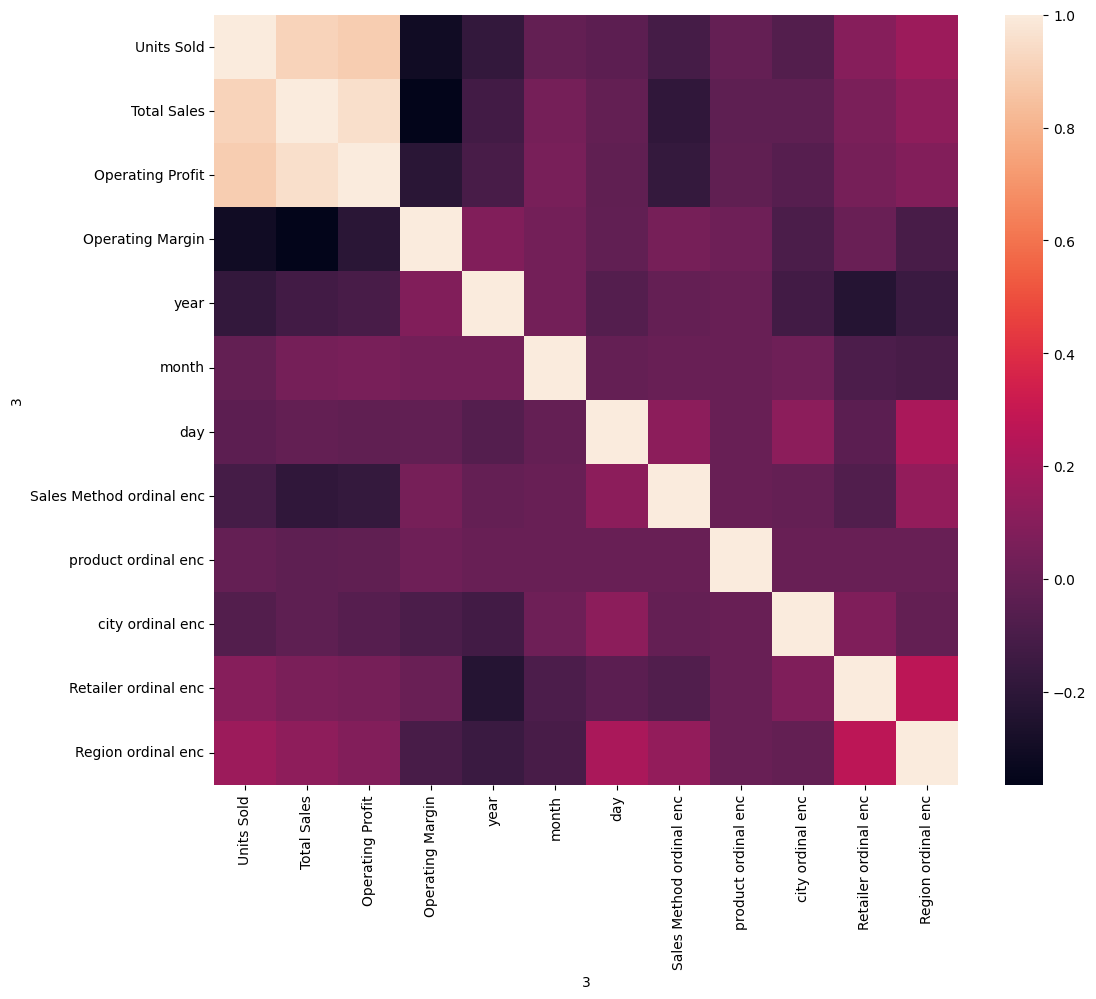

In [ ]:
plt.figure(figsize=(12,10))
dataplot = sns.heatmap(df.corr())

# 2. EDA

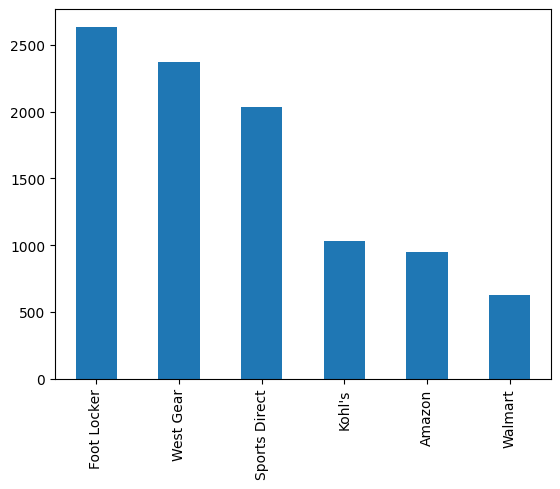

In [ ]:
# Count the number of occurrences of each retailer
retailer_counts = df['Retailer'].value_counts()
retailer_counts = retailer_counts.sort_values(ascending=False)
retailer_counts.plot(kind='bar')
plt.show()

In [ ]:
# Market Share of Retailers
import plotly.express as px
retailer_sales = df.groupby('Retailer')['Total Sales'].sum()
total_sales = retailer_sales.sum()
market_share = retailer_sales / total_sales
fig = px.pie(market_share, values=market_share, names=market_share.index, title='Market Share of Retailers')
fig.show()

In [ ]:
# Total Sales by Retailer
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])


df['month'] = df['Invoice Date'].dt.month
df['year'] = df['Invoice Date'].dt.year

retailer_sales = df.groupby(['Retailer', 'year', 'month'])['Total Sales'].sum()
retailer_sales_df = retailer_sales.unstack(level=0)
retailer_sales_df = retailer_sales_df.reset_index()
fig = px.line(retailer_sales_df, x='month', y=retailer_sales_df.columns[1:], title='Total Sales by Retailer')
fig.show()

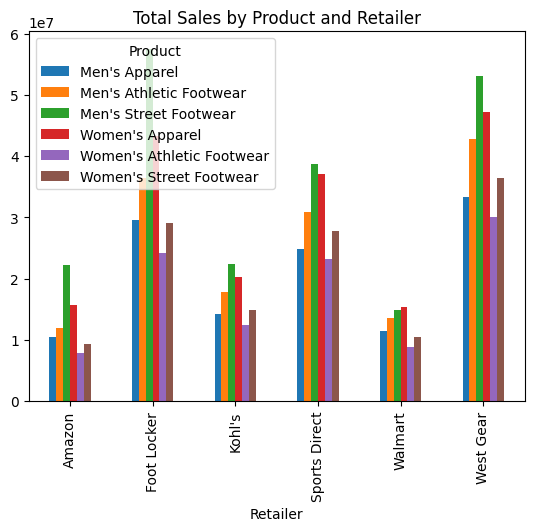

In [ ]:
# Total Sales by Product and Retailer
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.show()

In [ ]:
# Retailer sales by region
retailer_sales_by_region = df.groupby(['Retailer', 'Region'])['Total Sales'].sum()
retailer_sales_by_region_df = retailer_sales_by_region.unstack(level=0)
retailer_sales_by_region_df

Retailer,Amazon,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
Region,,,,,,
Midwest,16835873.0,47987394.0,22229415.0,26207191.0,NaN,22540586.0
Northeast,36262590.0,65326474.0,14031168.0,24698097.0,13712005.0,32293733.0
South,409091.0,9307025.0,3552055.0,65258121.0,33049858.0,33087031.0
Southeast,10826333.0,59669118.0,NaN,54178543.0,21005539.0,17491703.0
West,13365025.0,37804709.0,62302115.0,12129045.0,6791008.0,137551280.0


In [ ]:
# Total Sales by retailer and region
colors = ['blue', 'red','green', 'purple', 'orange']
fig = px.bar(retailer_sales_by_region_df, x=retailer_sales_by_region_df.index, y=retailer_sales_by_region_df.columns, color=colors, title='Total Sales by Retailer and Region')
fig.show()

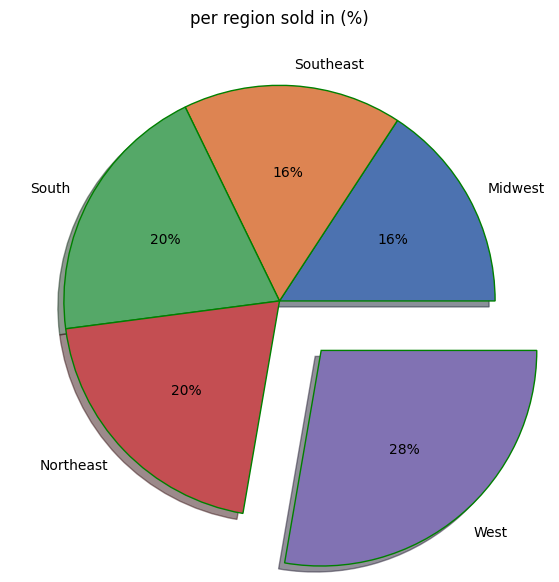

In [ ]:
sold=pd.DataFrame((df["Region"],df["Units Sold"]))
sold=sold.transpose()
sold_inpercent=pd.DataFrame((df["Region"],df["Units Sold"]))
sold_inpercent=sold_inpercent.transpose()
sold_inpercent= sold.groupby("Region").sum().reset_index().sort_values("Units Sold")


wp = { 'linewidth' : 1, 'edgecolor' : "green" }
explode = (0.0, 0.0, 0.0, 0.0, 0.3)
fig, ax = plt.subplots(figsize =(10, 7))
colors = sns.color_palette('deep')[0:5]
plt.pie(sold_inpercent["Units Sold"] , labels=sold_inpercent["Region"],colors = colors, shadow = True, wedgeprops = wp ,explode=explode,autopct='%.0f%%')
ax.set_title("per region sold in (%)");

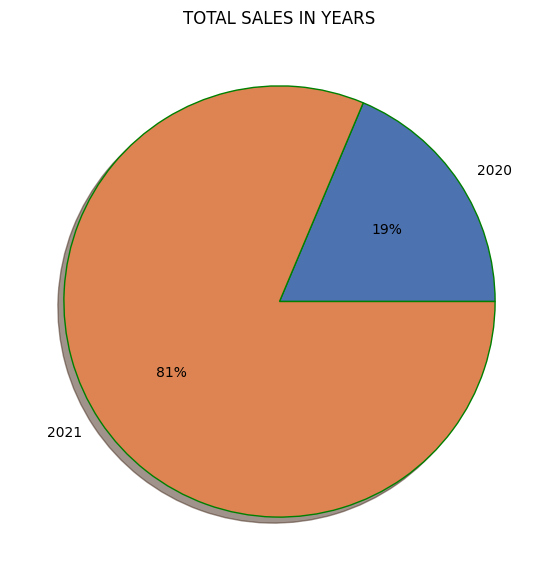

In [ ]:
year_sales=pd.DataFrame((df["year"],df["Units Sold"]))
year_sales=year_sales.transpose()
year_sales=year_sales.groupby("year").sum().reset_index().sort_values("Units Sold")
year_sales["year"]=year_sales["year"].astype(str)
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 7))
colors = sns.color_palette('deep')[0:5]
plt.pie(year_sales["Units Sold"] , labels=year_sales["year"],colors = colors, shadow = True, wedgeprops = wp ,autopct='%.0f%%')
ax.set_title("TOTAL SALES IN YEARS");

In [ ]:
# Adidas Sales Over Time

df_grouped = df.groupby(['year', 'month'])
sales_by_year_month = df_grouped['Total Sales'].sum()
units_by_year_month = df_grouped['Units Sold'].sum()
month_offset = [(year - 2020) * 12 + (month - 1) for year, month in sales_by_year_month.index]
fig = px.line(x=month_offset, y=sales_by_year_month.values, title='Adidas Sales Over Time')
fig.update_layout(
    title="Adidas Sales Over Time",
    xaxis_title="Months from 2020 to 2021",
    yaxis_title="Sales by year-month",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)

fig.show()

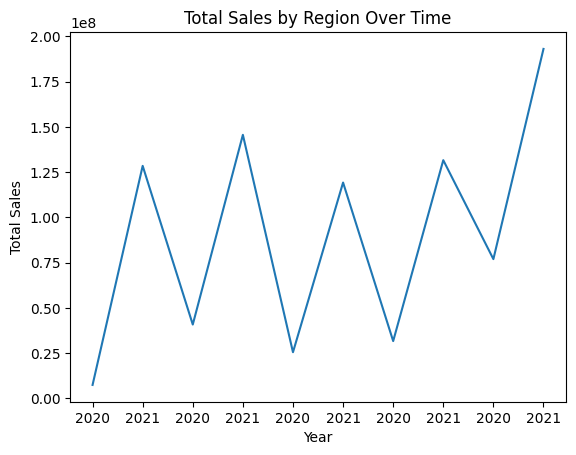

In [ ]:
# The total sales for each region

df_grouped = df.groupby(['Region', 'State', 'City'])
sales_by_location = df_grouped['Total Sales'].sum()
units_by_location = df_grouped['Units Sold'].sum()
region_sales = df.groupby(['Region', 'year'])['Total Sales'].sum()


regions = []
years = []
sales = []


for (region, year), sale in region_sales.items():
    regions.append(region)
    years.append(year)
    sales.append(sale)


x_pos = list(range(len(years)))
plt.plot(x_pos, sales)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region Over Time')
plt.xticks(x_pos, years)
plt.show()

<Axes: title={'center': 'Top Selling Methods'}, ylabel='Sales Method'>

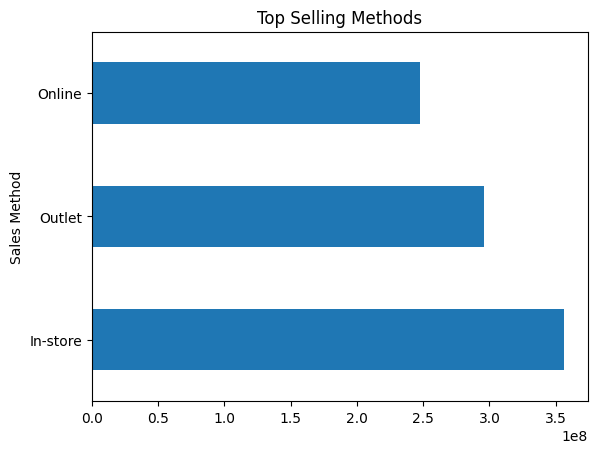

In [ ]:
# Top Selling Methods
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
top_methods.plot(kind='barh',title='Top Selling Methods')


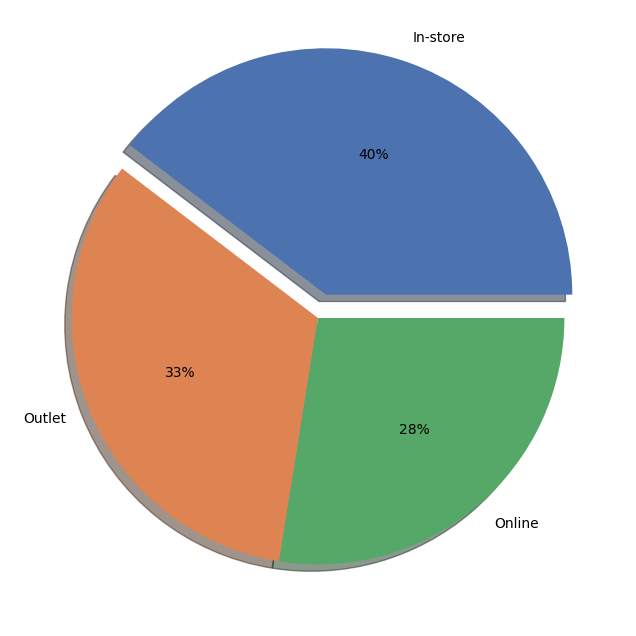

In [ ]:
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for pie chart we need 2 lists
data= list(top_methods['Total Sales']) #convert Operating Profit series in a list
labels = list(top_methods['Sales Method'])
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('deep')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0), shadow =True)
plt.show()

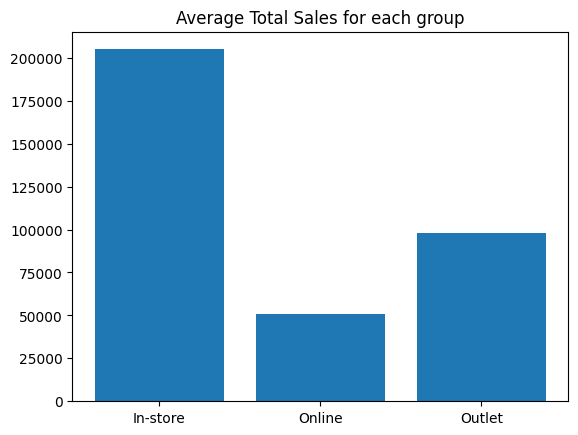

In [ ]:
# Average Total Sales for each group
sales_by_method = df.groupby('Sales Method')['Total Sales'].mean()

# Extract the data into separate lists
sales_methods = []
avg_total_sales = []

# Iterate through the groupby object and extract the values
for method, sales in sales_by_method.items():
    sales_methods.append(method)
    avg_total_sales.append(sales)

# Create the plot
fig, ax = plt.subplots()
ax.bar(sales_methods, avg_total_sales)
ax.set_title('Average Total Sales for each group')
plt.show()

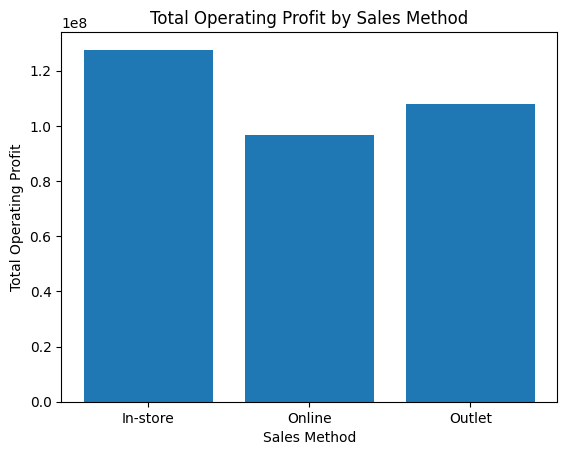

In [ ]:
# The total Operating Profit for each group
profit_by_method = df.groupby('Sales Method')['Operating Profit'].sum()

sales_methods = []
total_profits = []

for method, profit in profit_by_method.items():
    sales_methods.append(method)
    total_profits.append(profit)


fig, ax = plt.subplots()
ax.bar(sales_methods, total_profits)
ax.set_xlabel('Sales Method')
ax.set_ylabel('Total Operating Profit')
ax.set_title('Total Operating Profit by Sales Method')
plt.show()

Text(0.5, 1.0, 'Top Selling Products')

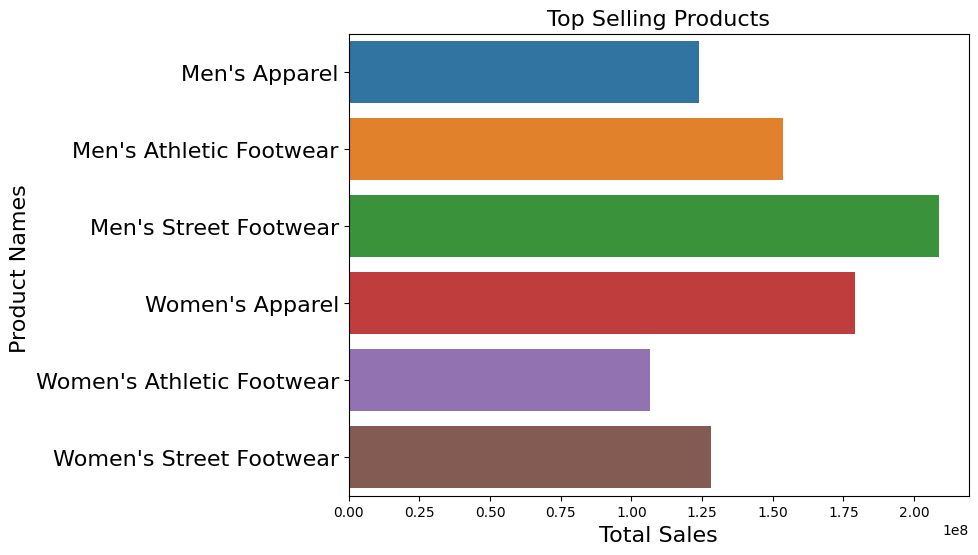

In [ ]:
# Top Selling Products
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index() #group by products and apply sum function on Total Sales Column
top_selling_products.index+=1 # the index starts from 0 by default so we plus 1 in index here
top_selling_products
fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)

45.21662520729685

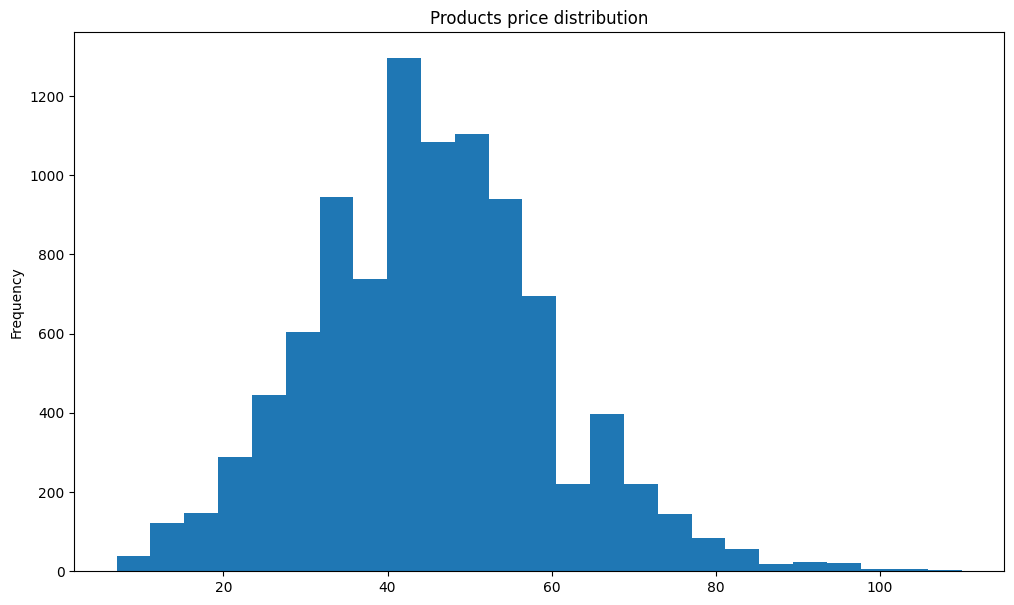

In [ ]:
# Products price distribution
df['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution')
df['Price per Unit'].mean()

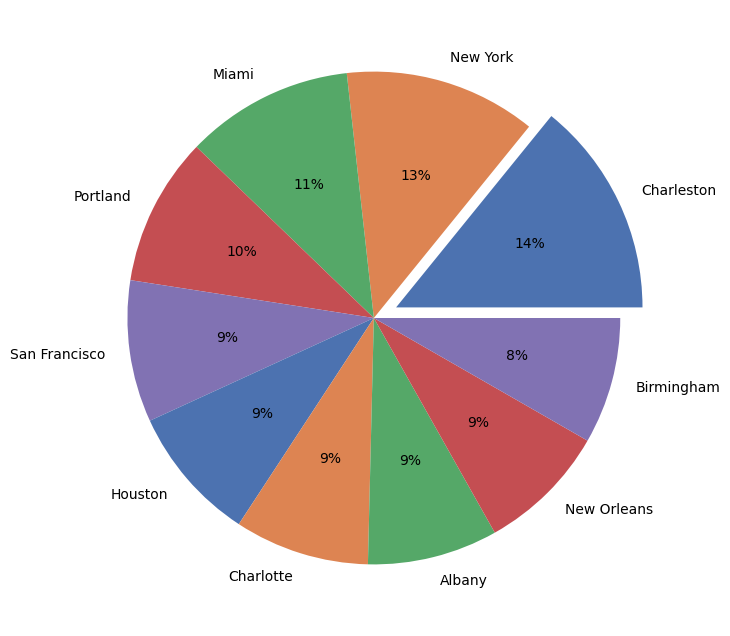

In [ ]:
# Pie Chart of Top Grossing Cities
top_grossing = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
#for pie chart we need 2 lists
data= list(top_grossing['Operating Profit']) #convert Operating Profit series in a list
labels = list(top_grossing['City']) #convert city series in a list
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('deep')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0,0,0,0,0,0,0,0))
plt.show()


In [ ]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Operating Margin,Sales Method,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000.0,...,0.50,In-store,2020,1,1,0.0,2.0,35.0,1.0,1.0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000.0,...,0.30,In-store,2020,1,2,0.0,1.0,35.0,1.0,1.0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000.0,...,0.35,In-store,2020,1,3,0.0,5.0,35.0,1.0,1.0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500.0,...,0.35,In-store,2020,1,4,0.0,4.0,35.0,1.0,1.0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000.0,...,0.30,In-store,2020,1,5,0.0,0.0,35.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200.0,...,0.28,Outlet,2021,1,24,2.0,0.0,30.0,1.0,1.0
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305.0,...,0.32,Outlet,2021,1,24,2.0,3.0,30.0,1.0,1.0
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544.0,...,0.37,Outlet,2021,2,22,2.0,2.0,30.0,1.0,1.0
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940.0,...,0.42,Outlet,2021,2,22,2.0,1.0,30.0,1.0,1.0


In [ ]:
df2 = df.copy()

In [ ]:
df2 = df2.drop(['Retailer','Retailer ID', 'Invoice Date', 'Region','State', 'City', 'Product', 'Sales Method'], axis=1)
df2

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc
0,50,1200,600000.0,300000.00,0.50,2020,1,1,0.0,2.0,35.0,1.0,1.0
1,50,1000,500000.0,150000.00,0.30,2020,1,2,0.0,1.0,35.0,1.0,1.0
2,40,1000,400000.0,140000.00,0.35,2020,1,3,0.0,5.0,35.0,1.0,1.0
3,45,850,382500.0,133875.00,0.35,2020,1,4,0.0,4.0,35.0,1.0,1.0
4,60,900,540000.0,162000.00,0.30,2020,1,5,0.0,0.0,35.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50,64,3200.0,896.00,0.28,2021,1,24,2.0,0.0,30.0,1.0,1.0
9644,41,105,4305.0,1377.60,0.32,2021,1,24,2.0,3.0,30.0,1.0,1.0
9645,41,184,7544.0,2791.28,0.37,2021,2,22,2.0,2.0,30.0,1.0,1.0
9646,42,70,2940.0,1234.80,0.42,2021,2,22,2.0,1.0,30.0,1.0,1.0


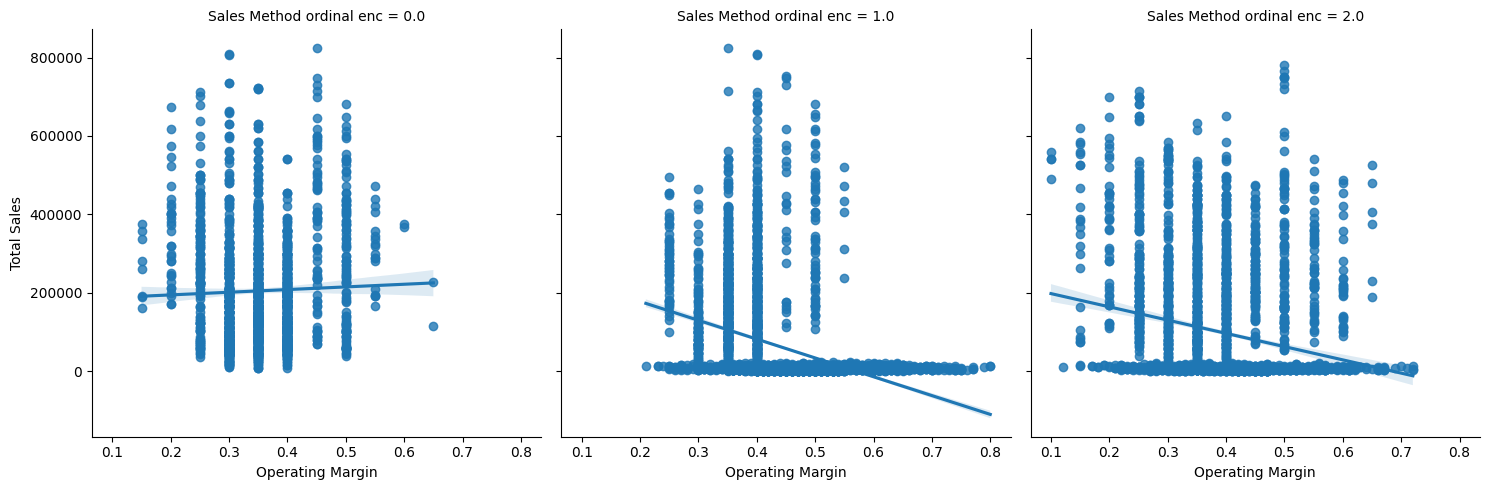

In [ ]:
# Profit Margin and Total Sales Regression
sns.lmplot(data = df2, x ='Operating Margin',y = 'Total Sales',col ='Sales Method ordinal enc')

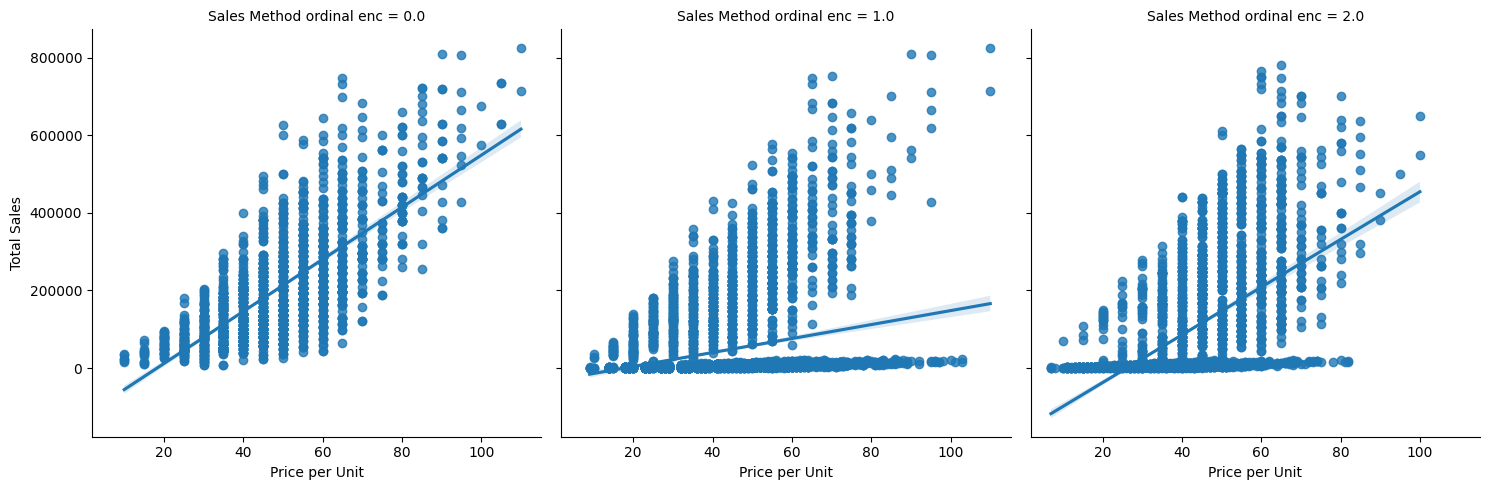

In [ ]:
# Price per Unit and Total Sales Regression
newdf = df2.copy()
newdf = newdf.astype('float64')
sns.lmplot(data = newdf, x ='Price per Unit',y = 'Total Sales',col ='Sales Method ordinal enc')

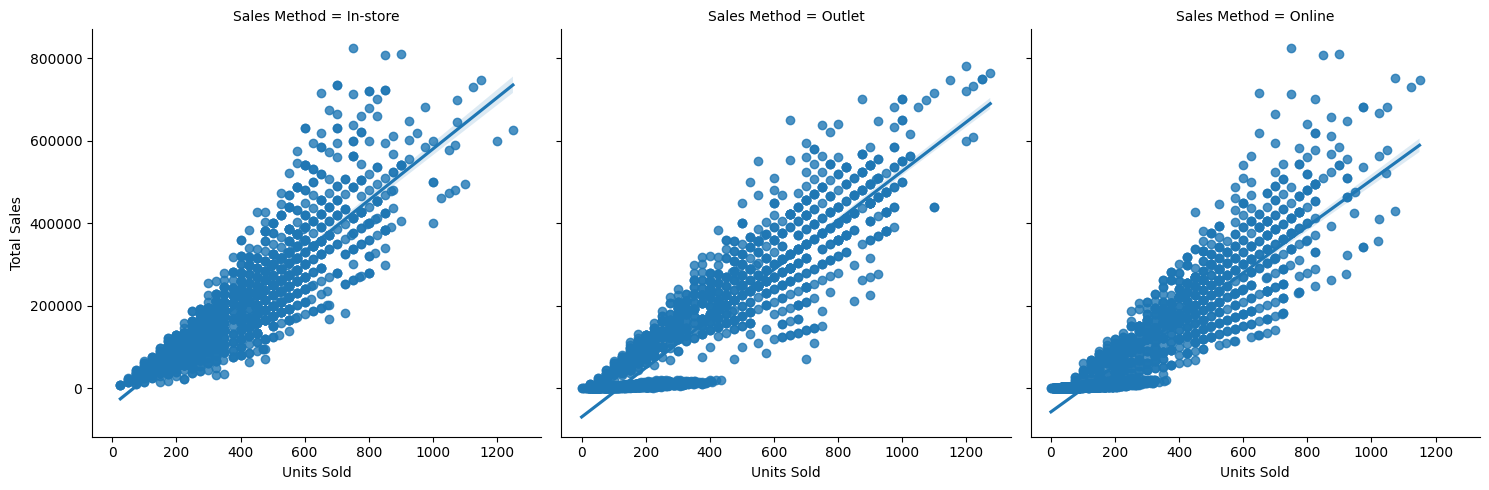

In [ ]:
# Units Sold and Total Sales Regression
sns.lmplot(data = df, x ='Units Sold',y = 'Total Sales',col ='Sales Method')

In [ ]:
df2

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc
0,50,1200,600000.0,300000.00,0.50,2020,1,1,0.0,2.0,35.0,1.0,1.0
1,50,1000,500000.0,150000.00,0.30,2020,1,2,0.0,1.0,35.0,1.0,1.0
2,40,1000,400000.0,140000.00,0.35,2020,1,3,0.0,5.0,35.0,1.0,1.0
3,45,850,382500.0,133875.00,0.35,2020,1,4,0.0,4.0,35.0,1.0,1.0
4,60,900,540000.0,162000.00,0.30,2020,1,5,0.0,0.0,35.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50,64,3200.0,896.00,0.28,2021,1,24,2.0,0.0,30.0,1.0,1.0
9644,41,105,4305.0,1377.60,0.32,2021,1,24,2.0,3.0,30.0,1.0,1.0
9645,41,184,7544.0,2791.28,0.37,2021,2,22,2.0,2.0,30.0,1.0,1.0
9646,42,70,2940.0,1234.80,0.42,2021,2,22,2.0,1.0,30.0,1.0,1.0


In [ ]:
newdf = df2.copy()
newdf

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc
0,50,1200,600000.0,300000.00,0.50,2020,1,1,0.0,2.0,35.0,1.0,1.0
1,50,1000,500000.0,150000.00,0.30,2020,1,2,0.0,1.0,35.0,1.0,1.0
2,40,1000,400000.0,140000.00,0.35,2020,1,3,0.0,5.0,35.0,1.0,1.0
3,45,850,382500.0,133875.00,0.35,2020,1,4,0.0,4.0,35.0,1.0,1.0
4,60,900,540000.0,162000.00,0.30,2020,1,5,0.0,0.0,35.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50,64,3200.0,896.00,0.28,2021,1,24,2.0,0.0,30.0,1.0,1.0
9644,41,105,4305.0,1377.60,0.32,2021,1,24,2.0,3.0,30.0,1.0,1.0
9645,41,184,7544.0,2791.28,0.37,2021,2,22,2.0,2.0,30.0,1.0,1.0
9646,42,70,2940.0,1234.80,0.42,2021,2,22,2.0,1.0,30.0,1.0,1.0


# 3. Features impacting wrt Total Sales

Dropping total sales and operating profit to see what are the key features to impact in total sales.

In [ ]:
dfTS = newdf.drop(['Total Sales', 'Operating Profit'], axis=1)
dfTS = pd.concat([dfTS, df2['Total Sales']],axis=1)
dfTS

,Price per Unit,Units Sold,Operating Margin,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc,Total Sales
0,50,1200,0.50,2020,1,1,0.0,2.0,35.0,1.0,1.0,600000.0
1,50,1000,0.30,2020,1,2,0.0,1.0,35.0,1.0,1.0,500000.0
2,40,1000,0.35,2020,1,3,0.0,5.0,35.0,1.0,1.0,400000.0
3,45,850,0.35,2020,1,4,0.0,4.0,35.0,1.0,1.0,382500.0
4,60,900,0.30,2020,1,5,0.0,0.0,35.0,1.0,1.0,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50,64,0.28,2021,1,24,2.0,0.0,30.0,1.0,1.0,3200.0
9644,41,105,0.32,2021,1,24,2.0,3.0,30.0,1.0,1.0,4305.0
9645,41,184,0.37,2021,2,22,2.0,2.0,30.0,1.0,1.0,7544.0
9646,42,70,0.42,2021,2,22,2.0,1.0,30.0,1.0,1.0,2940.0


In [ ]:
X = dfTS.iloc[:, 0:-1].values
y = dfTS.iloc[:, -1].values

In [ ]:
X

array([[50, 1200, 0.5, ..., 35.0, 1.0, 1.0],
       [50, 1000, 0.3, ..., 35.0, 1.0, 1.0],
       [40, 1000, 0.35, ..., 35.0, 1.0, 1.0],
       ...,
       [41, 184, 0.37000000000000005, ..., 30.0, 1.0, 1.0],
       [42, 70, 0.42000000000000004, ..., 30.0, 1.0, 1.0],
       [29, 83, 0.27, ..., 30.0, 1.0, 1.0]], dtype=object)

In [ ]:
y

array([600000., 500000., 400000., ...,   7544.,   2940.,   2407.])

Feature: 0, Score: 2075.83964
Feature: 1, Score: 561.39382
Feature: 2, Score: -120891.85978
Feature: 3, Score: 23159.98044
Feature: 4, Score: -156.84793
Feature: 5, Score: 299.36323
Feature: 6, Score: -9130.74835
Feature: 7, Score: 1373.97347
Feature: 8, Score: 193.34559
Feature: 9, Score: 158.99208
Feature: 10, Score: -5793.38040


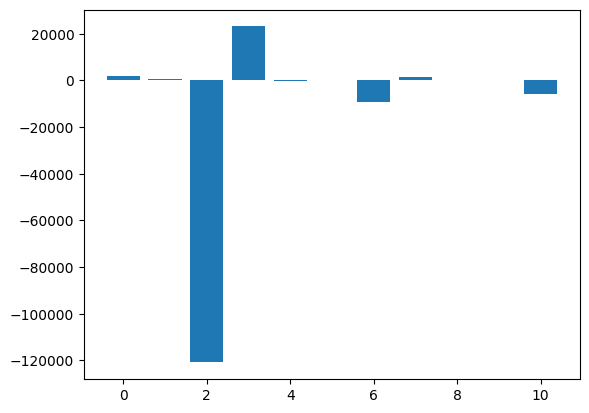

In [ ]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.11557
Feature: 1, Score: 0.85536
Feature: 2, Score: 0.00595
Feature: 3, Score: 0.00233
Feature: 4, Score: 0.00058
Feature: 5, Score: 0.00022
Feature: 6, Score: 0.01143
Feature: 7, Score: 0.00225
Feature: 8, Score: 0.00133
Feature: 9, Score: 0.00284
Feature: 10, Score: 0.00214


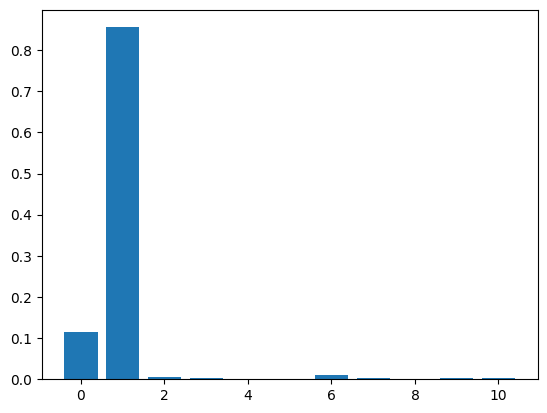

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model = DecisionTreeRegressor()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.11622
Feature: 1, Score: 0.85432
Feature: 2, Score: 0.00690
Feature: 3, Score: 0.00266
Feature: 4, Score: 0.00069
Feature: 5, Score: 0.00046
Feature: 6, Score: 0.01156
Feature: 7, Score: 0.00144
Feature: 8, Score: 0.00081
Feature: 9, Score: 0.00282
Feature: 10, Score: 0.00211


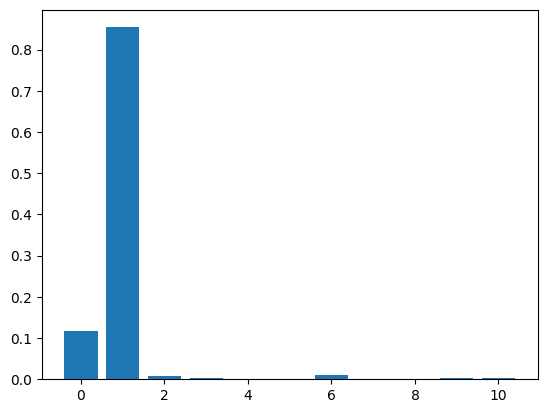

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.12361
Feature: 1, Score: 0.71123
Feature: 2, Score: 0.01540
Feature: 3, Score: 0.04291
Feature: 4, Score: 0.00103
Feature: 5, Score: 0.00068
Feature: 6, Score: 0.06210
Feature: 7, Score: 0.00461
Feature: 8, Score: 0.00216
Feature: 9, Score: 0.01850
Feature: 10, Score: 0.01777


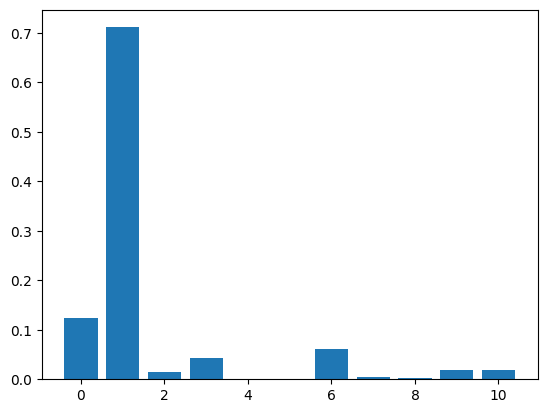

In [ ]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot
model = XGBRegressor()

model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 3551605039.51172
Feature: 1, Score: 32786314448.21786
Feature: 2, Score: 1287005.43327
Feature: 3, Score: 500847.39706
Feature: 4, Score: 54501887.42409
Feature: 5, Score: 164423804.91109
Feature: 6, Score: 4535836.24449
Feature: 7, Score: 2657792.05253
Feature: 8, Score: 378223101.15247
Feature: 9, Score: 13505860.19736
Feature: 10, Score: 17145270.60057


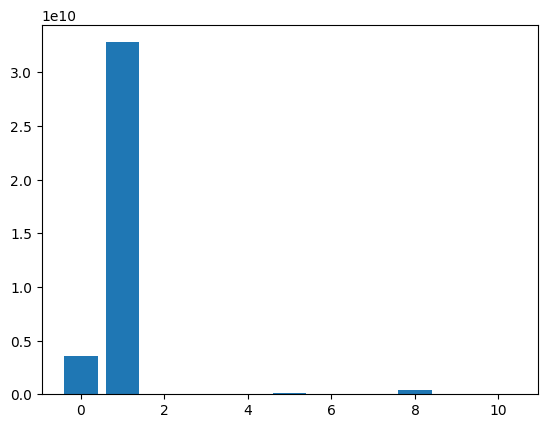

In [ ]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
model = KNeighborsRegressor()
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

It can be seen that `Price per Unit`, `Unit Sold`, and `Sales Method` are the key features to have impact in `Total Sales`

# 4. Predicting Total Sales

In [ ]:
R2Dict={}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Linear':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.89


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = Ridge(random_state=0, alpha=1.0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Ridge':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.89


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = linear_model.Lasso(alpha=0.1)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Lasso':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.89


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = linear_model.BayesianRidge()
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Bayesian Ridge':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.89


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = ElasticNet(random_state=0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Elastic':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8816


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = KNeighborsRegressor(n_neighbors=3)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'K-Neighbors':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.9693


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'XGB':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.9963


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = RandomForestRegressor(max_depth=7, random_state=0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Random Forrest':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.9919


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = AdaBoostRegressor(random_state=0, n_estimators=100)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'AdaBoost':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8872


In [ ]:
R2Dict

{'Linear': 0.89,
 'Ridge': 0.89,
 'Lasso': 0.89,
 'Bayesian Ridge': 0.89,
 'Elastic': 0.8816,
 'K-Neighbors': 0.9693,
 'XGB': 0.9963,
 'Random Forrest': 0.9919,
 'AdaBoost': 0.8872}

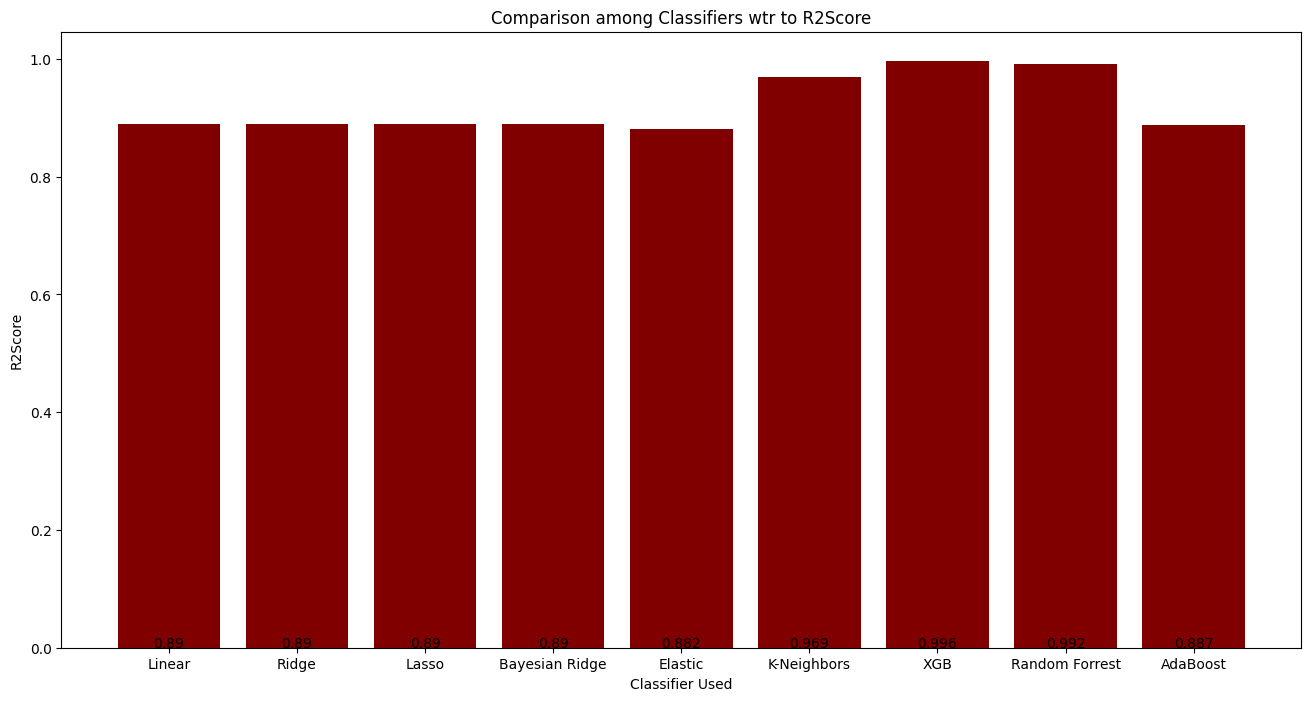

In [ ]:
# importing library
Classifier = list(R2Dict.keys())
R2Score = list(R2Dict.values())
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, y[i]//2, round(y[i],3), ha = 'center')

if __name__ == '__main__':

	# creating data on which bar chart will be plot
	x = Classifier

	y = R2Score

	# setting figure size by using figure() function
	plt.figure(figsize = (16,8))

	# making the bar chart on the data
	plt.bar(x, y,color="maroon")

	# calling the function to add value labels
	addlabels(x, y)

	# giving title to the plot
	plt.title("Comparison among Classifiers wtr to R2Score")

	# giving X and Y labels
	plt.xlabel("Classifier Used")
	plt.ylabel("R2Score")

	# visualizing the plot
	plt.show()


# 5. Features Impacting wrt Operating Profit

In [ ]:
dfTS = newdf.drop(['Total Sales', 'Operating Profit'], axis=1)
dfTS = pd.concat([dfTS, df2['Operating Profit']],axis=1)
dfTS

,Price per Unit,Units Sold,Operating Margin,year,month,day,Sales Method ordinal enc,product ordinal enc,city ordinal enc,Retailer ordinal enc,Region ordinal enc,Operating Profit
0,50,1200,0.50,2020,1,1,0.0,2.0,35.0,1.0,1.0,300000.00
1,50,1000,0.30,2020,1,2,0.0,1.0,35.0,1.0,1.0,150000.00
2,40,1000,0.35,2020,1,3,0.0,5.0,35.0,1.0,1.0,140000.00
3,45,850,0.35,2020,1,4,0.0,4.0,35.0,1.0,1.0,133875.00
4,60,900,0.30,2020,1,5,0.0,0.0,35.0,1.0,1.0,162000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50,64,0.28,2021,1,24,2.0,0.0,30.0,1.0,1.0,896.00
9644,41,105,0.32,2021,1,24,2.0,3.0,30.0,1.0,1.0,1377.60
9645,41,184,0.37,2021,2,22,2.0,2.0,30.0,1.0,1.0,2791.28
9646,42,70,0.42,2021,2,22,2.0,1.0,30.0,1.0,1.0,1234.80


In [ ]:
X = dfTS.iloc[:, 0:-1].values
y = dfTS.iloc[:, -1].values
X

array([[50, 1200, 0.5, ..., 35.0, 1.0, 1.0],
       [50, 1000, 0.3, ..., 35.0, 1.0, 1.0],
       [40, 1000, 0.35, ..., 35.0, 1.0, 1.0],
       ...,
       [41, 184, 0.37000000000000005, ..., 30.0, 1.0, 1.0],
       [42, 70, 0.42000000000000004, ..., 30.0, 1.0, 1.0],
       [29, 83, 0.27, ..., 30.0, 1.0, 1.0]], dtype=object)

Feature: 0, Score: 693.27735
Feature: 1, Score: 224.56617
Feature: 2, Score: 41409.10357
Feature: 3, Score: 10678.09309
Feature: 4, Score: 86.39792
Feature: 5, Score: 148.01747
Feature: 6, Score: -2803.68337
Feature: 7, Score: 389.11483
Feature: 8, Score: 40.67039
Feature: 9, Score: -130.47722
Feature: 10, Score: -2855.25614


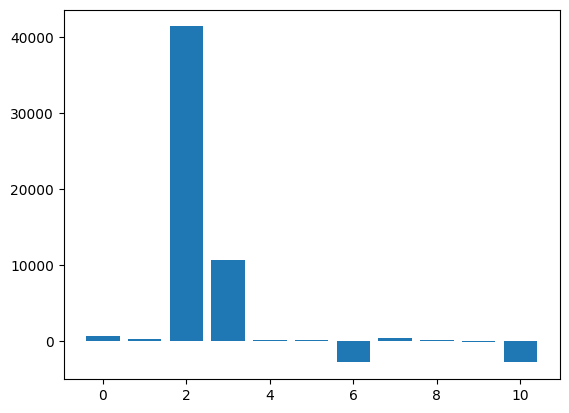

In [ ]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.09051
Feature: 1, Score: 0.80762
Feature: 2, Score: 0.07686
Feature: 3, Score: 0.00365
Feature: 4, Score: 0.00126
Feature: 5, Score: 0.00133
Feature: 6, Score: 0.00975
Feature: 7, Score: 0.00151
Feature: 8, Score: 0.00128
Feature: 9, Score: 0.00183
Feature: 10, Score: 0.00441


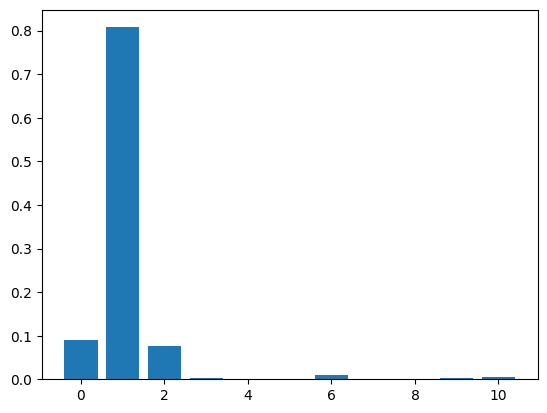

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model = DecisionTreeRegressor()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08973
Feature: 1, Score: 0.80948
Feature: 2, Score: 0.07507
Feature: 3, Score: 0.00332
Feature: 4, Score: 0.00176
Feature: 5, Score: 0.00146
Feature: 6, Score: 0.00997
Feature: 7, Score: 0.00161
Feature: 8, Score: 0.00205
Feature: 9, Score: 0.00212
Feature: 10, Score: 0.00343


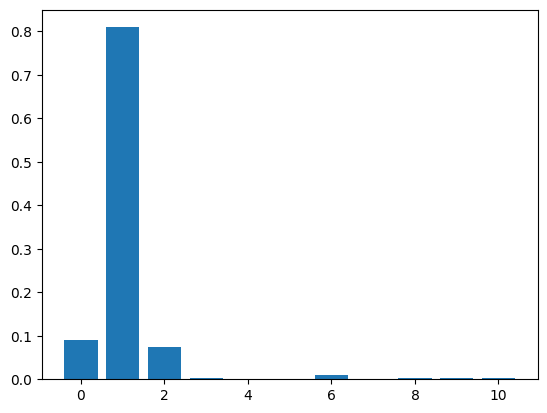

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.08738
Feature: 1, Score: 0.66158
Feature: 2, Score: 0.09627
Feature: 3, Score: 0.05088
Feature: 4, Score: 0.00184
Feature: 5, Score: 0.00078
Feature: 6, Score: 0.05830
Feature: 7, Score: 0.00677
Feature: 8, Score: 0.00297
Feature: 9, Score: 0.01132
Feature: 10, Score: 0.02192


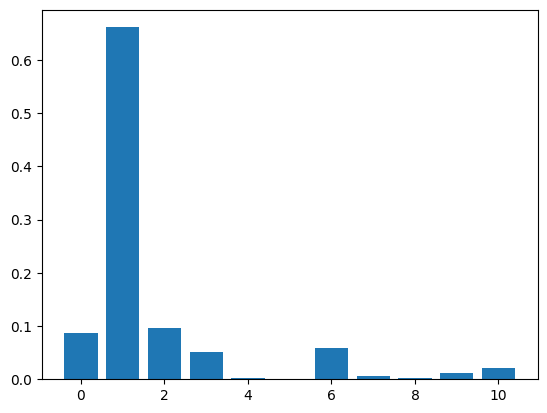

In [ ]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot
model = XGBRegressor()

model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 448152107.82886
Feature: 1, Score: 4682403271.26558
Feature: 2, Score: 288510.16888
Feature: 3, Score: 182912.70426
Feature: 4, Score: 10603212.44161
Feature: 5, Score: 33077442.24558
Feature: 6, Score: 846093.38187
Feature: 7, Score: 774621.05061
Feature: 8, Score: 122278454.52937
Feature: 9, Score: 1382845.36585
Feature: 10, Score: 2741960.50615


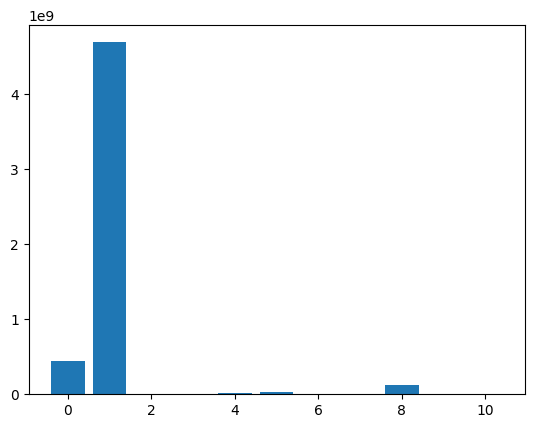

In [ ]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
model = KNeighborsRegressor()
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

It can be seen that `Price per Unit`, `Unit Sold`,`Operating Margin` and `Sales Method` are the key features to have impact in `Operating Profit`.

# 6. Predicting Operating Profit

In [ ]:
R2Dict={}

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Linear':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8415


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = Ridge(random_state=0, alpha=1.0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Ridge':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8415


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = linear_model.Lasso(alpha=0.1)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Lasso':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8415


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = linear_model.BayesianRidge()
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Bayesian Ridge':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8415


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = ElasticNet(random_state=0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Elastic':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8336


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = KNeighborsRegressor(n_neighbors=3)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'K-Neighbors':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8898


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'XGB':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.9942


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = RandomForestRegressor(max_depth=7, random_state=0)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'Random Forrest':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.9769


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=114, shuffle=True)
avg=[]
for train_index, test_index in cv.split(X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    regr = AdaBoostRegressor(random_state=0, n_estimators=100)
    regr.fit(x_train, y_train)
    avg.append(regr.score(x_test, y_test))

print(f"5 fold R2 score is {round(sum(avg)/5.0,4)}")
res = {'AdaBoost':round(sum(avg)/5.0,4)}
R2Dict.update(res)

5 fold R2 score is 0.8149


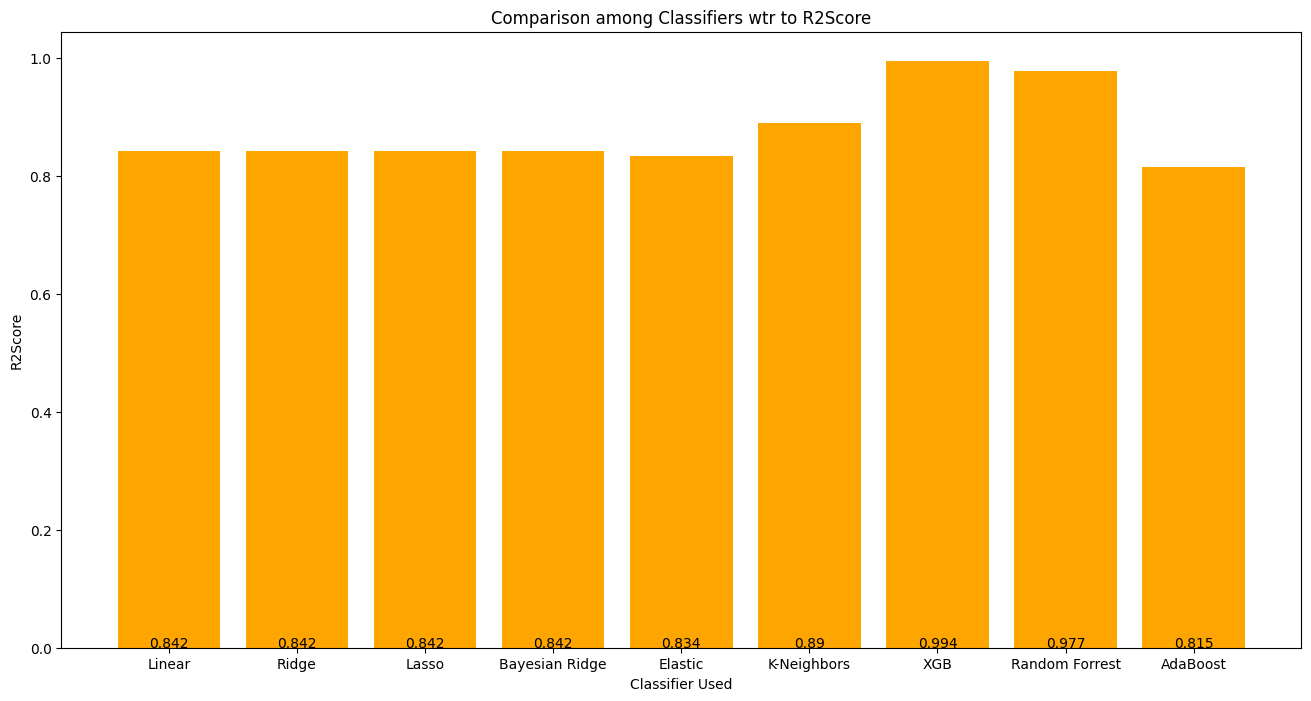

In [ ]:
# importing library
Classifier = list(R2Dict.keys())
R2Score = list(R2Dict.values())
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
	for i in range(len(x)):
		plt.text(i, y[i]//2, round(y[i],3), ha = 'center')

if __name__ == '__main__':

	# creating data on which bar chart will be plot
	x = Classifier

	y = R2Score

	# setting figure size by using figure() function
	plt.figure(figsize = (16,8))

	# making the bar chart on the data
	plt.bar(x, y,color="orange")

	# calling the function to add value labels
	addlabels(x, y)

	# giving title to the plot
	plt.title("Comparison among Classifiers wtr to R2Score")

	# giving X and Y labels
	plt.xlabel("Classifier Used")
	plt.ylabel("R2Score")

	# visualizing the plot
	plt.show()
